In [1]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [33]:
library(dplyr)
library(ggplot2)
library(ggpubr)

In [80]:
all_info <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_info.txt")

In [81]:
dim(all_info)

[1] 2309    7

In [61]:
#########PFC样本ADAR家族表达情况
expression_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884066_GW12_PFC1.UMI_TPM_no_ERCC.txt",header=T)
head(expression_12)

rownames(expression_12) <- expression_12[,1]
expression_12 <- expression_12[,-1]
head(expression_12)
#expression_12 <- expression_12[,-1]
####按细胞类型对表达分组
info_12 <- all_info[all_info$week=='GW12',]
dim(info_12)
####GABA-ADAR1
cell_name_GABA <- rownames(info_12)[info_12$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_12),cell_name_GABA)
adar1_expr_GABA <- expression_12['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- mean(adar1_expr_GABA[adar1_expr_GABA!=0])
####neuron-ADAR1
cell_name_neuron <- rownames(info_12)[info_12$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_12),cell_name_neuron)
adar1_expr_neuron <- expression_12['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- mean(adar1_expr_neuron[adar1_expr_neuron!=0])
####OPC-ADAR1
cell_name_opc <- rownames(info_12)[info_12$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_12),cell_name_opc)
adar1_expr_opc <- expression_12['ADAR',cell_name_opc]
mean_adar1_expr_opc <- mean(adar1_expr_opc[adar1_expr_opc!=0])
all_celltype_adar1_12 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW12_PFC1_sc1,GW12_PFC1_sc2,GW12_PFC1_sc3,GW12_PFC1_sc4,GW12_PFC1_sc5,GW12_PFC1_sc6,GW12_PFC1_sc7,GW12_PFC1_sc8,GW12_PFC1_sc9,⋯,GW12_PFC1_sc81,GW12_PFC1_sc82,GW12_PFC1_sc83,GW12_PFC1_sc84,GW12_PFC1_sc85,GW12_PFC1_sc86,GW12_PFC1_sc87,GW12_PFC1_sc88,GW12_PFC1_sc89,GW12_PFC1_sc90
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0.00,0,5.65,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,A1BG-AS1,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,A1CF,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,A2M,0,6.33,0,70.64,5.79,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,A2M-AS1,0,0.00,0,124.32,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A2ML1,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,GW12_PFC1_sc1,GW12_PFC1_sc2,GW12_PFC1_sc3,GW12_PFC1_sc4,GW12_PFC1_sc5,GW12_PFC1_sc6,GW12_PFC1_sc7,GW12_PFC1_sc8,GW12_PFC1_sc9,GW12_PFC1_sc10,⋯,GW12_PFC1_sc81,GW12_PFC1_sc82,GW12_PFC1_sc83,GW12_PFC1_sc84,GW12_PFC1_sc85,GW12_PFC1_sc86,GW12_PFC1_sc87,GW12_PFC1_sc88,GW12_PFC1_sc89,GW12_PFC1_sc90
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.00,0,5.65,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1CF,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,6.33,0,70.64,5.79,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0.00,0,124.32,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 85  8

In [73]:
#########PFC样本ADAR家族表达情况
expression_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
head(expression_16)

rownames(expression_16) <- expression_16[,1]
expression_16 <- expression_16[,-1]
head(expression_16)
#expression_16 <- expression_16[,-1]
####按细胞类型对表达分组
info_16 <- all_info[all_info$week=='GW16',]
dim(info_16)
####GABA-ADAR1
cell_name_GABA <- rownames(info_16)[info_16$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_16),cell_name_GABA)
adar1_expr_GABA <- expression_16['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- mean(adar1_expr_GABA[adar1_expr_GABA!=0])
####neuron-ADAR1
cell_name_neuron <- rownames(info_16)[info_16$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_16),cell_name_neuron)
adar1_expr_neuron <- expression_16['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- mean(adar1_expr_neuron[adar1_expr_neuron!=0])
####OPC-ADAR1
cell_name_opc <- rownames(info_16)[info_16$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_16),cell_name_opc)
adar1_expr_opc <- expression_16['ADAR',cell_name_opc]
mean_adar1_expr_opc <- mean(adar1_expr_opc[adar1_expr_opc!=0])
all_celltype_adar1_16 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW16_PFC1_D3_sc1,GW16_PFC1_D3_sc2,GW16_PFC1_D3_sc3,GW16_PFC1_D3_sc4,GW16_PFC1_D3_sc5,GW16_PFC1_D3_sc6,GW16_PFC1_D3_sc7,GW16_PFC1_D3_sc8,GW16_PFC1_D3_sc9,⋯,GW16_PFC1_VL3_sc7,GW16_PFC1_VL3_sc8,GW16_PFC1_VL3_sc9,GW16_PFC1_VL3_sc10,GW16_PFC1_VL3_sc11,GW16_PFC1_VL3_sc12,GW16_PFC1_VL3_sc13,GW16_PFC1_VL3_sc14,GW16_PFC1_VL3_sc15,GW16_PFC1_VL3_sc16
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,2.32,0.00,0,0,0,0,0.00,0,2.49,⋯,0,0,0,0,0.00,0,0,0,0.00,11.53
2,A1BG-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
3,A1CF,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
4,A2M,0.00,33.99,0,0,0,0,66.24,0,17.44,⋯,0,0,0,0,93.96,0,0,0,0.00,2.88
5,A2M-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
6,A2ML1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,2.86,0.00


,GW16_PFC1_D3_sc1,GW16_PFC1_D3_sc2,GW16_PFC1_D3_sc3,GW16_PFC1_D3_sc4,GW16_PFC1_D3_sc5,GW16_PFC1_D3_sc6,GW16_PFC1_D3_sc7,GW16_PFC1_D3_sc8,GW16_PFC1_D3_sc9,GW16_PFC1_D3_sc10,⋯,GW16_PFC1_VL3_sc7,GW16_PFC1_VL3_sc8,GW16_PFC1_VL3_sc9,GW16_PFC1_VL3_sc10,GW16_PFC1_VL3_sc11,GW16_PFC1_VL3_sc12,GW16_PFC1_VL3_sc13,GW16_PFC1_VL3_sc14,GW16_PFC1_VL3_sc15,GW16_PFC1_VL3_sc16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,2.32,0.00,0,0,0,0,0.00,0,2.49,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,11.53
A1BG-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A1CF,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A2M,0.00,33.99,0,0,0,0,66.24,0,17.44,4.14,⋯,0,0,0,0,93.96,0,0,0,0.00,2.88
A2M-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A2ML1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,2.86,0.00


[1] 87  8

In [78]:
adar1_expr_opc
mean_adar1_expr_opc
dim(expression_16)
dim(expression_26)

,GW16_PFC1_D3_sc22,GW16_PFC1_D4_sc2,GW16_PFC1_D4_sc19,GW16_PFC1_VL2_sc2
,<dbl>,<dbl>,<dbl>,<dbl>
ADAR,0,0,107.47,0


[1] 107.47

[1] 24153    88

[1] 24153    79

In [63]:
#########PFC样本ADAR家族表达情况
expression_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884077_GW19_PFC1.UMI_TPM_no_ERCC.txt",header=T)
head(expression_19)

rownames(expression_19) <- expression_19[,1]
expression_19 <- expression_19[,-1]
head(expression_19)
#expression_19 <- expression_19[,-1]
####按细胞类型对表达分组
info_19 <- all_info[all_info$week=='GW19',]
dim(info_19)
####GABA-ADAR1
cell_name_GABA <- rownames(info_19)[info_19$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_19),cell_name_GABA)
adar1_expr_GABA <- expression_19['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- mean(adar1_expr_GABA[adar1_expr_GABA!=0])
####neuron-ADAR1
cell_name_neuron <- rownames(info_19)[info_19$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_19),cell_name_neuron)
adar1_expr_neuron <- expression_19['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- mean(adar1_expr_neuron[adar1_expr_neuron!=0])
####OPC-ADAR1
cell_name_opc <- rownames(info_19)[info_19$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_19),cell_name_opc)
adar1_expr_opc <- expression_19['ADAR',cell_name_opc]
mean_adar1_expr_opc <- mean(adar1_expr_opc[adar1_expr_opc!=0])
all_celltype_adar1_19 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW19_PFC1_sc1,GW19_PFC1_sc2,GW19_PFC1_sc3,GW19_PFC1_sc4,GW19_PFC1_sc5,GW19_PFC1_sc6,GW19_PFC1_sc7,GW19_PFC1_sc8,GW19_PFC1_sc9,⋯,GW19_PFC1_sc31,GW19_PFC1_sc32,GW19_PFC1_sc33,GW19_PFC1_sc34,GW19_PFC1_sc35,GW19_PFC1_sc36,GW19_PFC1_sc37,GW19_PFC1_sc38,GW19_PFC1_sc39,GW19_PFC1_sc40
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
2,A1BG-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
3,A1CF,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
4,A2M,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,81.36,147.43
5,A2M-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,244.08,0.00
6,A2ML1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00


,GW19_PFC1_sc1,GW19_PFC1_sc2,GW19_PFC1_sc3,GW19_PFC1_sc4,GW19_PFC1_sc5,GW19_PFC1_sc6,GW19_PFC1_sc7,GW19_PFC1_sc8,GW19_PFC1_sc9,GW19_PFC1_sc10,⋯,GW19_PFC1_sc31,GW19_PFC1_sc32,GW19_PFC1_sc33,GW19_PFC1_sc34,GW19_PFC1_sc35,GW19_PFC1_sc36,GW19_PFC1_sc37,GW19_PFC1_sc38,GW19_PFC1_sc39,GW19_PFC1_sc40
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0,0,0,0,0,0,0,0,565.34,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A1BG-AS1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A1CF,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A2M,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,81.36,147.43
A2M-AS1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,244.08,0.00
A2ML1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00


[1] 40  8

In [64]:
#########PFC样本ADAR家族表达情况
expression_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884091_GW26_PFC1_8.UMI_TPM_no_ERCC.txt",header=T)
head(expression_26)

rownames(expression_26) <- expression_26[,1]
expression_26 <- expression_26[,-1]
head(expression_26)
#expression_26 <- expression_26[,-1]
####按细胞类型对表达分组
info_26 <- all_info[all_info$week=='GW26',]
dim(info_26)
####GABA-ADAR1
cell_name_GABA <- rownames(info_26)[info_26$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_26),cell_name_GABA)
adar1_expr_GABA <- expression_26['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- mean(adar1_expr_GABA[adar1_expr_GABA!=0])
####neuron-ADAR1
cell_name_neuron <- rownames(info_26)[info_26$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_26),cell_name_neuron)
adar1_expr_neuron <- expression_26['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- mean(adar1_expr_neuron[adar1_expr_neuron!=0])
####OPC-ADAR1
cell_name_opc <- rownames(info_26)[info_26$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_26),cell_name_opc)
adar1_expr_opc <- expression_26['ADAR',cell_name_opc]
mean_adar1_expr_opc <- mean(adar1_expr_opc[adar1_expr_opc!=0])
all_celltype_adar1_26 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW26_PFC1_K1_sc2,GW26_PFC1_K1_sc3,GW26_PFC1_K1_sc4,GW26_PFC1_K1_sc5,GW26_PFC1_K1_sc6,GW26_PFC1_K1_sc7,GW26_PFC1_K1_sc8,GW26_PFC1_K1_sc9,GW26_PFC1_K1_sc10,⋯,GW26_PFC1_R1_sc7,GW26_PFC1_R1_sc8,GW26_PFC1_R1_sc9,GW26_PFC1_R1_sc10,GW26_PFC1_R1_sc11,GW26_PFC1_R1_sc12,GW26_PFC1_R1_sc13,GW26_PFC1_R1_sc14,GW26_PFC1_R1_sc15,GW26_PFC1_R1_sc16
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0,0.00,0,0.00,0.00,0,0,0,⋯,21.21,0,0,0,0,0,0,0,0,0.00
2,A1BG-AS1,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
3,A1CF,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
4,A2M,0,0,8.76,0,0.00,2.74,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,72.17
5,A2M-AS1,0,0,0.00,0,128.58,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
6,A2ML1,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00


,GW26_PFC1_K1_sc2,GW26_PFC1_K1_sc3,GW26_PFC1_K1_sc4,GW26_PFC1_K1_sc5,GW26_PFC1_K1_sc6,GW26_PFC1_K1_sc7,GW26_PFC1_K1_sc8,GW26_PFC1_K1_sc9,GW26_PFC1_K1_sc10,GW26_PFC1_K1_sc11,⋯,GW26_PFC1_R1_sc7,GW26_PFC1_R1_sc8,GW26_PFC1_R1_sc9,GW26_PFC1_R1_sc10,GW26_PFC1_R1_sc11,GW26_PFC1_R1_sc12,GW26_PFC1_R1_sc13,GW26_PFC1_R1_sc14,GW26_PFC1_R1_sc15,GW26_PFC1_R1_sc16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,21.21,0,0,0,0,0,0,0,0,0.00
A1BG-AS1,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A1CF,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A2M,0,0,8.76,0,0.00,2.74,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,72.17
A2M-AS1,0,0,0.00,0,128.58,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A2ML1,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00


[1] 67  8

In [65]:
all_adar_expr <- c(all_celltype_adar1_12,all_celltype_adar1_16,all_celltype_adar1_19,all_celltype_adar1_26)

In [66]:
all_adar_expr

[1]  56.18333  96.12875   6.22500  18.06667  89.62100 107.47000  17.29750
 [8]  98.03429  23.46000 138.57200  53.71333  41.57333

In [24]:
rep(c("GABA","Neuron","OPC"),times=4)

[1] "GABA"   "Neuron" "OPC"    "GABA"   "Neuron" "OPC"    "GABA"   "Neuron"
 [9] "OPC"    "GABA"   "Neuron" "OPC"

In [67]:
all_adars <- data.frame(
  #group=c(rep(c("MGE-GABA","GLU","Olig"),AEI_nums)),
  #group=c(rep(c("Microglia","CGE-derived InN","MGE-derived InN","Olig","Astrocyte","DG ExN","Non_DG ExN"),AEI_nums)),
  group=c(rep(c("GABA","Neuron","OPC"),times=4)),
  expr=all_adar_expr,
  phase=c(rep(c("12","16","19","26"),each=3))  
)


In [68]:
all_adars

group,expr,phase
<chr>,<dbl>,<chr>
GABA,56.18333,12
Neuron,96.12875,12
OPC,6.22500,12
GABA,18.06667,16
Neuron,89.62100,16
OPC,107.47000,16
GABA,17.29750,19
Neuron,98.03429,19
OPC,23.46000,19


In [69]:
group_by(all_adars, group) %>%
  summarise(
    count = n(),
    mean = mean(expr, na.rm = TRUE),
    sd = sd(expr, na.rm = TRUE),
    rg = range(expr, na.rm = TRUE)
  )
all_adars$group = factor(all_adars$group, levels=c("GABA","Neuron","OPC"))


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,count,mean,sd,rg
<chr>,<int>,<dbl>,<dbl>,<dbl>
GABA,4,57.52987,56.99599,17.29750
GABA,4,57.52987,56.99599,138.57200
Neuron,4,84.37434,20.75560,53.71333
Neuron,4,84.37434,20.75560,98.03429
OPC,4,44.68208,44.27682,6.22500
OPC,4,44.68208,44.27682,107.47000


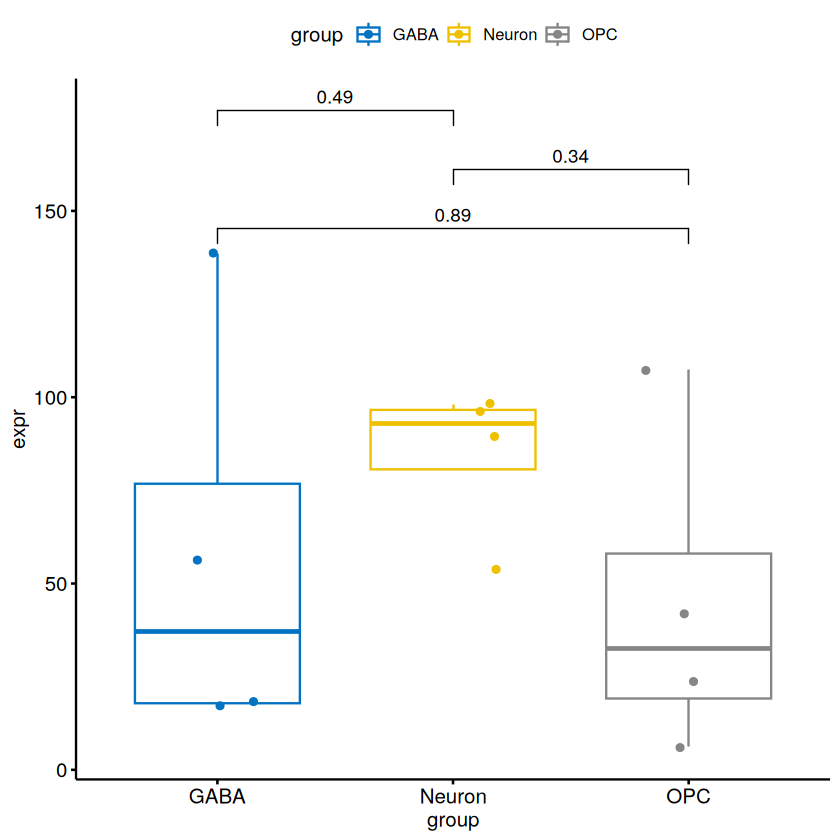

In [38]:

compaired_adar <- list(c("GABA","OPC"),
                         c("Neuron","OPC"),
                         c("GABA","Neuron"))

ggboxplot(all_adars, x="group", y = "expr", color = "group", palette = "jco", add = "jitter",  short.panel.labs = FALSE) +
  stat_compare_means(comparisons=compaired_adar,method="wilcox.test",label="p.format",paired=F, step_increase = 0.5)



In [70]:
all_adars$expr[all_adars$group=='Neuron']
all_adars$expr[all_adars$group=='OPC']
all_adars$expr[all_adars$group=='GABA']


[1] 96.12875 89.62100 98.03429 53.71333

[1]   6.22500 107.47000  23.46000  41.57333

[1]  56.18333  18.06667  17.29750 138.57200

In [45]:
#########PFC样本ADAR家族表达情况
expression_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
head(expression_16)

rownames(expression_16) <- expression_16[,1]
expression_16 <- expression_16[,-1]
head(expression_16)
#expression_16 <- expression_16[,-1]
####按细胞类型对表达分组
info_16 <- all_info[all_info$week=='GW16',]
dim(info_16)
####GABA-ADAR1
cell_name_GABA <- rownames(info_16)[info_16$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_16),cell_name_GABA)
RBFOX1_expr_GABA <- expression_16['RBFOX1',cell_name_GABA]
NEUROD2_expr_GABA <- expression_16['NEUROD2',cell_name_GABA]
GAD1_expr_GABA <- expression_16['GAD1',cell_name_GABA]
PDE4DIP_expr_GABA <- expression_16['PDE4DIP',cell_name_GABA]
mean_RBFOX1_expr_GABA <- mean(RBFOX1_expr_GABA[RBFOX1_expr_GABA!=0])
mean_NEUROD2_expr_GABA <- mean(NEUROD2_expr_GABA[NEUROD2_expr_GABA!=0])
mean_GAD1_expr_GABA <- mean(GAD1_expr_GABA[GAD1_expr_GABA!=0])
mean_PDE4DIP_expr_GABA <- mean(PDE4DIP_expr_GABA[PDE4DIP_expr_GABA!=0])
####neuron-ADAR1
cell_name_neuron <- rownames(info_16)[info_16$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_16),cell_name_neuron)
RBFOX1_expr_neuron <- expression_16['RBFOX1',cell_name_neuron]
NEUROD2_expr_neuron <- expression_16['NEUROD2',cell_name_neuron]
GAD1_expr_neuron <- expression_16['GAD1',cell_name_neuron]
PDE4DIP_expr_neuron <- expression_16['PDE4DIP',cell_name_neuron]
mean_RBFOX1_expr_neuron <- mean(RBFOX1_expr_neuron[RBFOX1_expr_neuron!=0])
mean_NEUROD2_expr_neuron <- mean(NEUROD2_expr_neuron[NEUROD2_expr_neuron!=0])
mean_GAD1_expr_neuron <- mean(GAD1_expr_neuron[GAD1_expr_neuron!=0])
mean_PDE4DIP_expr_neuron <- mean(PDE4DIP_expr_neuron[PDE4DIP_expr_neuron!=0])


,Gene,GW16_PFC1_D3_sc1,GW16_PFC1_D3_sc2,GW16_PFC1_D3_sc3,GW16_PFC1_D3_sc4,GW16_PFC1_D3_sc5,GW16_PFC1_D3_sc6,GW16_PFC1_D3_sc7,GW16_PFC1_D3_sc8,GW16_PFC1_D3_sc9,⋯,GW16_PFC1_VL3_sc7,GW16_PFC1_VL3_sc8,GW16_PFC1_VL3_sc9,GW16_PFC1_VL3_sc10,GW16_PFC1_VL3_sc11,GW16_PFC1_VL3_sc12,GW16_PFC1_VL3_sc13,GW16_PFC1_VL3_sc14,GW16_PFC1_VL3_sc15,GW16_PFC1_VL3_sc16
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,2.32,0.00,0,0,0,0,0.00,0,2.49,⋯,0,0,0,0,0.00,0,0,0,0.00,11.53
2,A1BG-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
3,A1CF,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
4,A2M,0.00,33.99,0,0,0,0,66.24,0,17.44,⋯,0,0,0,0,93.96,0,0,0,0.00,2.88
5,A2M-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
6,A2ML1,0.00,0.00,0,0,0,0,0.00,0,0.00,⋯,0,0,0,0,0.00,0,0,0,2.86,0.00


,GW16_PFC1_D3_sc1,GW16_PFC1_D3_sc2,GW16_PFC1_D3_sc3,GW16_PFC1_D3_sc4,GW16_PFC1_D3_sc5,GW16_PFC1_D3_sc6,GW16_PFC1_D3_sc7,GW16_PFC1_D3_sc8,GW16_PFC1_D3_sc9,GW16_PFC1_D3_sc10,⋯,GW16_PFC1_VL3_sc7,GW16_PFC1_VL3_sc8,GW16_PFC1_VL3_sc9,GW16_PFC1_VL3_sc10,GW16_PFC1_VL3_sc11,GW16_PFC1_VL3_sc12,GW16_PFC1_VL3_sc13,GW16_PFC1_VL3_sc14,GW16_PFC1_VL3_sc15,GW16_PFC1_VL3_sc16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,2.32,0.00,0,0,0,0,0.00,0,2.49,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,11.53
A1BG-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A1CF,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A2M,0.00,33.99,0,0,0,0,66.24,0,17.44,4.14,⋯,0,0,0,0,93.96,0,0,0,0.00,2.88
A2M-AS1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,0.00,0.00
A2ML1,0.00,0.00,0,0,0,0,0.00,0,0.00,0.00,⋯,0,0,0,0,0.00,0,0,0,2.86,0.00


[1] 87  8

In [46]:
mean_GAD1_expr_GABA
mean_PDE4DIP_expr_GABA
mean_GAD1_expr_neuron
mean_PDE4DIP_expr_neuron

[1] 931.688

[1] 1199.874

[1] 15.16542

[1] 92.28342

In [44]:
mean_RBFOX1_expr_GABA
mean_NEUROD2_expr_GABA
mean_RBFOX1_expr_neuron
mean_NEUROD2_expr_neuron

[1] 70.92667

[1] 47.978

[1] 281.014

[1] 462.3465

In [56]:
#########PFC样本ADAR家族表达情况
expression_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884066_GW12_PFC1.UMI_TPM_no_ERCC.txt",header=T)
head(expression_12)

rownames(expression_12) <- expression_12[,1]
expression_12 <- expression_12[,-1]
head(expression_12)
#expression_12 <- expression_12[,-1]
####按细胞类型对表达分组
info_12 <- all_info[all_info$week=='GW12',]
dim(info_12)
####GABA-ADAR1
cell_name_GABA <- rownames(info_12)[info_12$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_12),cell_name_GABA)
adar1_expr_GABA <- expression_12['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- sum(adar1_expr_GABA)/length(adar1_expr_GABA)

####neuron-ADAR1
cell_name_neuron <- rownames(info_12)[info_12$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_12),cell_name_neuron)
adar1_expr_neuron <- expression_12['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- sum(adar1_expr_neuron)/length(adar1_expr_neuron)
####OPC-ADAR1
cell_name_opc <- rownames(info_12)[info_12$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_12),cell_name_opc)
adar1_expr_opc <- expression_12['ADAR',cell_name_opc]
mean_adar1_expr_opc <- sum(adar1_expr_opc)/length(adar1_expr_opc)
all_celltype_adar1_12 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW12_PFC1_sc1,GW12_PFC1_sc2,GW12_PFC1_sc3,GW12_PFC1_sc4,GW12_PFC1_sc5,GW12_PFC1_sc6,GW12_PFC1_sc7,GW12_PFC1_sc8,GW12_PFC1_sc9,⋯,GW12_PFC1_sc81,GW12_PFC1_sc82,GW12_PFC1_sc83,GW12_PFC1_sc84,GW12_PFC1_sc85,GW12_PFC1_sc86,GW12_PFC1_sc87,GW12_PFC1_sc88,GW12_PFC1_sc89,GW12_PFC1_sc90
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0.00,0,5.65,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,A1BG-AS1,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,A1CF,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,A2M,0,6.33,0,70.64,5.79,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,A2M-AS1,0,0.00,0,124.32,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A2ML1,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,GW12_PFC1_sc1,GW12_PFC1_sc2,GW12_PFC1_sc3,GW12_PFC1_sc4,GW12_PFC1_sc5,GW12_PFC1_sc6,GW12_PFC1_sc7,GW12_PFC1_sc8,GW12_PFC1_sc9,GW12_PFC1_sc10,⋯,GW12_PFC1_sc81,GW12_PFC1_sc82,GW12_PFC1_sc83,GW12_PFC1_sc84,GW12_PFC1_sc85,GW12_PFC1_sc86,GW12_PFC1_sc87,GW12_PFC1_sc88,GW12_PFC1_sc89,GW12_PFC1_sc90
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.00,0,5.65,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1CF,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,6.33,0,70.64,5.79,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0.00,0,124.32,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0.00,0,0.00,0.00,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 85  8

In [57]:
#########PFC样本ADAR家族表达情况
expression_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
head(expression_16)

rownames(expression_16) <- expression_16[,1]
expression_16 <- expression_16[,-1]
head(expression_16)
#expression_16 <- expression_16[,-1]
####按细胞类型对表达分组
info_16 <- all_info[all_info$week=='GW16',]
dim(info_16)
####GABA-ADAR1
cell_name_GABA <- rownames(info_16)[info_16$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_16),cell_name_GABA)
adar1_expr_GABA <- expression_16['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- sum(adar1_expr_GABA)/length(adar1_expr_GABA)

####neuron-ADAR1
cell_name_neuron <- rownames(info_16)[info_16$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_16),cell_name_neuron)
adar1_expr_neuron <- expression_16['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- sum(adar1_expr_neuron)/length(adar1_expr_neuron)
####OPC-ADAR1
cell_name_opc <- rownames(info_16)[info_16$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_16),cell_name_opc)
adar1_expr_opc <- expression_16['ADAR',cell_name_opc]
mean_adar1_expr_opc <- sum(adar1_expr_opc)/length(adar1_expr_opc)
all_celltype_adar1_16 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

[1] 24.07857 24.41365  6.22500

In [58]:
#########PFC样本ADAR家族表达情况
expression_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884077_GW19_PFC1.UMI_TPM_no_ERCC.txt",header=T)
head(expression_19)

rownames(expression_19) <- expression_19[,1]
expression_19 <- expression_19[,-1]
head(expression_19)
#expression_19 <- expression_19[,-1]
####按细胞类型对表达分组
info_19 <- all_info[all_info$week=='GW19',]
dim(info_19)
####GABA-ADAR1
cell_name_GABA <- rownames(info_19)[info_19$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_19),cell_name_GABA)
adar1_expr_GABA <- expression_19['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- sum(adar1_expr_GABA)/length(adar1_expr_GABA)

####neuron-ADAR1
cell_name_neuron <- rownames(info_19)[info_19$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_19),cell_name_neuron)
adar1_expr_neuron <- expression_19['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- sum(adar1_expr_neuron)/length(adar1_expr_neuron)
####OPC-ADAR1
cell_name_opc <- rownames(info_19)[info_19$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_19),cell_name_opc)
adar1_expr_opc <- expression_19['ADAR',cell_name_opc]
mean_adar1_expr_opc <- sum(adar1_expr_opc)/length(adar1_expr_opc)
all_celltype_adar1_19 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW19_PFC1_sc1,GW19_PFC1_sc2,GW19_PFC1_sc3,GW19_PFC1_sc4,GW19_PFC1_sc5,GW19_PFC1_sc6,GW19_PFC1_sc7,GW19_PFC1_sc8,GW19_PFC1_sc9,⋯,GW19_PFC1_sc31,GW19_PFC1_sc32,GW19_PFC1_sc33,GW19_PFC1_sc34,GW19_PFC1_sc35,GW19_PFC1_sc36,GW19_PFC1_sc37,GW19_PFC1_sc38,GW19_PFC1_sc39,GW19_PFC1_sc40
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
2,A1BG-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
3,A1CF,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
4,A2M,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,81.36,147.43
5,A2M-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,244.08,0.00
6,A2ML1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00


,GW19_PFC1_sc1,GW19_PFC1_sc2,GW19_PFC1_sc3,GW19_PFC1_sc4,GW19_PFC1_sc5,GW19_PFC1_sc6,GW19_PFC1_sc7,GW19_PFC1_sc8,GW19_PFC1_sc9,GW19_PFC1_sc10,⋯,GW19_PFC1_sc31,GW19_PFC1_sc32,GW19_PFC1_sc33,GW19_PFC1_sc34,GW19_PFC1_sc35,GW19_PFC1_sc36,GW19_PFC1_sc37,GW19_PFC1_sc38,GW19_PFC1_sc39,GW19_PFC1_sc40
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0,0,0,0,0,0,0,0,565.34,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A1BG-AS1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A1CF,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00
A2M,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,81.36,147.43
A2M-AS1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,244.08,0.00
A2ML1,0,0,0,0,0,0,0,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0.00,0.00


[1] 40  8

In [59]:
#########PFC样本ADAR家族表达情况
expression_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884091_GW26_PFC1_8.UMI_TPM_no_ERCC.txt",header=T)
head(expression_26)

rownames(expression_26) <- expression_26[,1]
expression_26 <- expression_26[,-1]
head(expression_26)
#expression_26 <- expression_26[,-1]
####按细胞类型对表达分组
info_26 <- all_info[all_info$week=='GW26',]
dim(info_26)
####GABA-ADAR1
cell_name_GABA <- rownames(info_26)[info_26$cell_types=='GABAergic_neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_GABA <- intersect(colnames(expression_26),cell_name_GABA)
adar1_expr_GABA <- expression_26['ADAR',cell_name_GABA]
mean_adar1_expr_GABA <- sum(adar1_expr_GABA)/length(adar1_expr_GABA)

####neuron-ADAR1
cell_name_neuron <- rownames(info_26)[info_26$cell_types=='Neurons']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_neuron <- intersect(colnames(expression_26),cell_name_neuron)
adar1_expr_neuron <- expression_26['ADAR',cell_name_neuron]
mean_adar1_expr_neuron <- sum(adar1_expr_neuron)/length(adar1_expr_neuron)
####OPC-ADAR1
cell_name_opc <- rownames(info_26)[info_26$cell_types=='OPC']
#ADAR''ADARB1''ADARB2''ADARB2-AS1
cell_name_opc <- intersect(colnames(expression_26),cell_name_opc)
adar1_expr_opc <- expression_26['ADAR',cell_name_opc]
mean_adar1_expr_opc <- sum(adar1_expr_opc)/length(adar1_expr_opc)
all_celltype_adar1_26 <- c(mean_adar1_expr_GABA,mean_adar1_expr_neuron,mean_adar1_expr_opc)

,Gene,GW26_PFC1_K1_sc2,GW26_PFC1_K1_sc3,GW26_PFC1_K1_sc4,GW26_PFC1_K1_sc5,GW26_PFC1_K1_sc6,GW26_PFC1_K1_sc7,GW26_PFC1_K1_sc8,GW26_PFC1_K1_sc9,GW26_PFC1_K1_sc10,⋯,GW26_PFC1_R1_sc7,GW26_PFC1_R1_sc8,GW26_PFC1_R1_sc9,GW26_PFC1_R1_sc10,GW26_PFC1_R1_sc11,GW26_PFC1_R1_sc12,GW26_PFC1_R1_sc13,GW26_PFC1_R1_sc14,GW26_PFC1_R1_sc15,GW26_PFC1_R1_sc16
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0,0,0.00,0,0.00,0.00,0,0,0,⋯,21.21,0,0,0,0,0,0,0,0,0.00
2,A1BG-AS1,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
3,A1CF,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
4,A2M,0,0,8.76,0,0.00,2.74,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,72.17
5,A2M-AS1,0,0,0.00,0,128.58,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
6,A2ML1,0,0,0.00,0,0.00,0.00,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00


,GW26_PFC1_K1_sc2,GW26_PFC1_K1_sc3,GW26_PFC1_K1_sc4,GW26_PFC1_K1_sc5,GW26_PFC1_K1_sc6,GW26_PFC1_K1_sc7,GW26_PFC1_K1_sc8,GW26_PFC1_K1_sc9,GW26_PFC1_K1_sc10,GW26_PFC1_K1_sc11,⋯,GW26_PFC1_R1_sc7,GW26_PFC1_R1_sc8,GW26_PFC1_R1_sc9,GW26_PFC1_R1_sc10,GW26_PFC1_R1_sc11,GW26_PFC1_R1_sc12,GW26_PFC1_R1_sc13,GW26_PFC1_R1_sc14,GW26_PFC1_R1_sc15,GW26_PFC1_R1_sc16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,21.21,0,0,0,0,0,0,0,0,0.00
A1BG-AS1,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A1CF,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A2M,0,0,8.76,0,0.00,2.74,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,72.17
A2M-AS1,0,0,0.00,0,128.58,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00
A2ML1,0,0,0.00,0,0.00,0.00,0,0,0,0,⋯,0.00,0,0,0,0,0,0,0,0,0.00


[1] 67  8

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,count,mean,sd,rg
<chr>,<int>,<dbl>,<dbl>,<dbl>
GABA,4,22.29793,14.35323,6.29000
GABA,4,22.29793,14.35323,40.75647
Neuron,4,39.40569,34.36737,12.39538
Neuron,4,39.40569,34.36737,89.62100
OPC,4,35.16830,48.35452,6.22500
OPC,4,35.16830,48.35452,107.47000


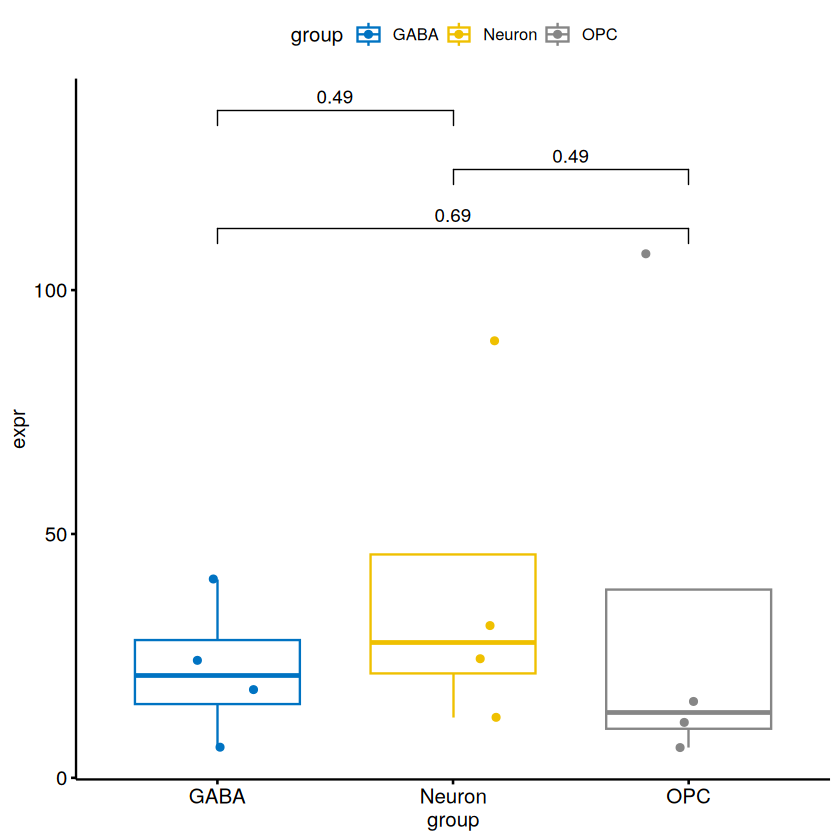

In [60]:
all_adar_expr <- c(all_celltype_adar1_12,all_celltype_adar1_16,all_celltype_adar1_19,all_celltype_adar1_26)
all_adars <- data.frame(
  #group=c(rep(c("MGE-GABA","GLU","Olig"),AEI_nums)),
  #group=c(rep(c("Microglia","CGE-derived InN","MGE-derived InN","Olig","Astrocyte","DG ExN","Non_DG ExN"),AEI_nums)),
  group=c(rep(c("GABA","Neuron","OPC"),times=4)),
  expr=all_adar_expr,
  phase=c(rep(c("12","16","19","26"),each=3))  
)

group_by(all_adars, group) %>%
  summarise(
    count = n(),
    mean = mean(expr, na.rm = TRUE),
    sd = sd(expr, na.rm = TRUE),
    rg = range(expr, na.rm = TRUE)
  )
all_adars$group = factor(all_adars$group, levels=c("GABA","Neuron","OPC"))


compaired_adar <- list(c("GABA","OPC"),
                         c("Neuron","OPC"),
                         c("GABA","Neuron"))

ggboxplot(all_adars, x="group", y = "expr", color = "group", palette = "jco", add = "jitter",  short.panel.labs = FALSE) +
  stat_compare_means(comparisons=compaired_adar,method="wilcox.test",label="p.format",paired=F, step_increase = 0.5)



In [79]:
1578/2

[1] 789